In [93]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

import tensorflow as tf 

In [2]:
W_true = 2
b_true = 0.5

In [38]:
x = np.linspace(0, 3, 130)

y = W_true * x + b_true + np.random.randn(*x.shape) * 0.5

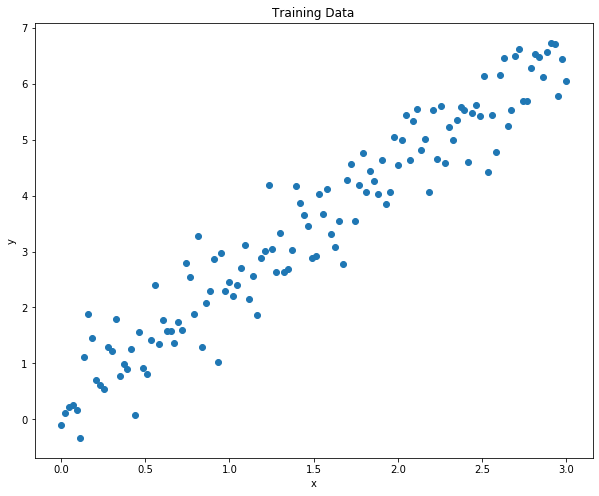

In [39]:
plt.figure(figsize=(10, 8))

plt.scatter(x, y)

plt.xlabel('x') 
plt.ylabel('y') 

plt.title("Training Data") 
plt.show() 

Defining the model

In [47]:
class LinearModel:

    def __init__(self):
        self.weight = tf.Variable(np.random.randn(), name = "W")
        self.bias = tf.Variable(np.random.randn(), name = "b") 
        
    def __call__(self, x):
        return self.weight * x + self.bias

Defining the loss function

In [49]:
def loss(y, y_pred):
    return tf.reduce_mean(tf.square(y - y_pred))

Training function

In [51]:
def train(linear_model, x, y, lr = 0.01):
    
    with tf.GradientTape() as tape:
        
        y_pred = linear_model(x)
        
        current_loss = loss(y, y_pred)

    d_weight, d_bias = tape.gradient(current_loss, 
                                     [linear_model.weight, linear_model.bias])
    
    linear_model.weight.assign_sub(lr * d_weight)
    linear_model.bias.assign_sub(lr * d_bias)

### Note:
    First give epochs = 10, show the graph, then epochs = 50 and epochs = 100 show the graph each time

In [68]:
linear_model = LinearModel()

weights, biases = [], []

epochs = 100

lr = 0.15

In [69]:
for epoch_count in range(epochs):
    
    weights.append(linear_model.weight.numpy()) 
    biases.append(linear_model.bias.numpy())
    
    real_loss = loss(y, linear_model(x))
    
    train(linear_model, x, y, lr = 0.12)
    
    print(f"Epoch count {epoch_count}: Loss value: {real_loss.numpy()}")

Epoch count 0: Loss value: 32.58353042602539
Epoch count 1: Loss value: 0.5290930271148682
Epoch count 2: Loss value: 0.2936752438545227
Epoch count 3: Loss value: 0.289306640625
Epoch count 4: Loss value: 0.2868628203868866
Epoch count 5: Loss value: 0.28465884923934937
Epoch count 6: Loss value: 0.28266122937202454
Epoch count 7: Loss value: 0.2808505892753601
Epoch count 8: Loss value: 0.2792094647884369
Epoch count 9: Loss value: 0.27772197127342224
Epoch count 10: Loss value: 0.2763737142086029
Epoch count 11: Loss value: 0.2751515805721283
Epoch count 12: Loss value: 0.2740439474582672
Epoch count 13: Loss value: 0.27303993701934814
Epoch count 14: Loss value: 0.27212995290756226
Epoch count 15: Loss value: 0.2713051438331604
Epoch count 16: Loss value: 0.2705575227737427
Epoch count 17: Loss value: 0.26987987756729126
Epoch count 18: Loss value: 0.26926568150520325
Epoch count 19: Loss value: 0.2687089443206787
Epoch count 20: Loss value: 0.2682044208049774
Epoch count 21: Loss 

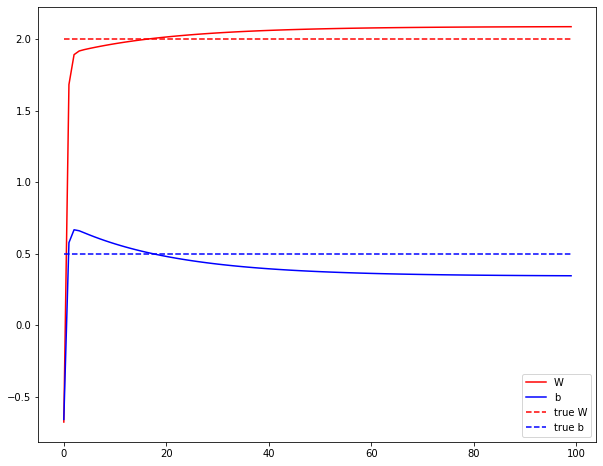

In [70]:
plt.figure(figsize=(10, 8))

plt.plot(range(epochs), weights, 'r', range(epochs), biases, 'b')
plt.plot([W_true] * epochs, 'r--', [b_true] * epochs, 'b--')

plt.legend(['W', 'b', 'true W', 'true b'])
plt.show()

In [71]:
linear_model.weight.numpy(), linear_model.bias.numpy()

(2.0864003, 0.34551474)

In [72]:
rmse = loss(y, linear_model(x))

rmse.numpy()

0.2633204

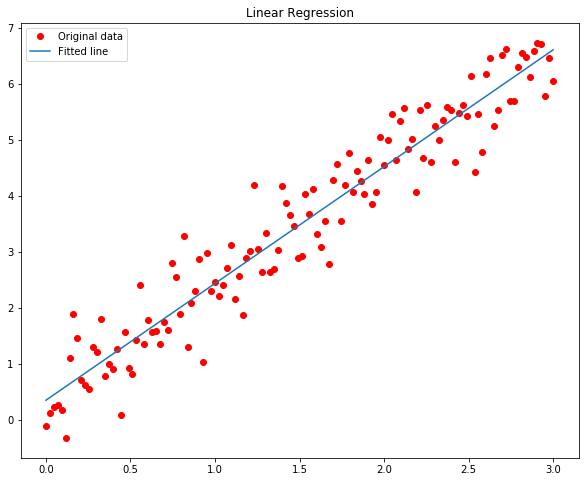

In [74]:
plt.figure(figsize=(10, 8))

plt.plot(x, y, 'ro', label = 'Original data') 
plt.plot(x, linear_model(x), label = 'Fitted line') 

plt.title('Linear Regression') 

plt.legend() 
plt.show() 

### Using model.fit()

In [80]:
from tensorflow import keras
from tensorflow.keras import layers

In [81]:
x.shape, y.shape

((130, 1), (130, 1))

In [82]:
x = pd.DataFrame(x, columns = ['x'])     
y = pd.DataFrame(y, columns = ['y'])     

In [83]:
x.head()

,x
0,0.000000
1,0.023256
2,0.046512
3,0.069767
4,0.093023


In [84]:
y.head()

,y
0,-0.111933
1,0.119471
2,0.225526
3,0.262347
4,0.166542


In [79]:
x.shape, y.shape

((130, 1), (130, 1))

In [85]:
model = keras.Sequential([layers.Dense(1, input_shape = (1,), activation = 'linear')])

optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001)

model.compile(loss = 'mse', metrics = ['mse'], optimizer = optimizer)

In [88]:
model.fit(x, y, epochs = 100)

Train on 130 samples
Epoch 1/100
130/130 [==============================] - 0s 329us/sample - loss: 0.2768 - mse: 0.2768
Epoch 2/100
130/130 [==============================] - 0s 212us/sample - loss: 0.2767 - mse: 0.2767
Epoch 3/100
130/130 [==============================] - 0s 338us/sample - loss: 0.2767 - mse: 0.2767
Epoch 4/100
130/130 [==============================] - 0s 167us/sample - loss: 0.2765 - mse: 0.2765
Epoch 5/100
130/130 [==============================] - 0s 276us/sample - loss: 0.2764 - mse: 0.2764
Epoch 6/100
130/130 [==============================] - 0s 219us/sample - loss: 0.2764 - mse: 0.2764
Epoch 7/100
130/130 [==============================] - 0s 216us/sample - loss: 0.2763 - mse: 0.2763
Epoch 8/100
130/130 [==============================] - 0s 261us/sample - loss: 0.2762 - mse: 0.2762
Epoch 9/100
130/130 [==============================] - 0s 208us/sample - loss: 0.2762 - mse: 0.2762
Epoch 10/100
130/130 [==============================] - 0s 154us/sample - loss:

130/130 [==============================] - 0s 177us/sample - loss: 0.2731 - mse: 0.2731
Epoch 82/100
130/130 [==============================] - 0s 173us/sample - loss: 0.2730 - mse: 0.2730
Epoch 83/100
130/130 [==============================] - 0s 202us/sample - loss: 0.2731 - mse: 0.2731
Epoch 84/100
130/130 [==============================] - 0s 202us/sample - loss: 0.2729 - mse: 0.2729
Epoch 85/100
130/130 [==============================] - 0s 234us/sample - loss: 0.2729 - mse: 0.2729
Epoch 86/100
130/130 [==============================] - 0s 151us/sample - loss: 0.2728 - mse: 0.2728
Epoch 87/100
130/130 [==============================] - 0s 154us/sample - loss: 0.2728 - mse: 0.2728
Epoch 88/100
130/130 [==============================] - 0s 128us/sample - loss: 0.2727 - mse: 0.2727
Epoch 89/100
130/130 [==============================] - 0s 132us/sample - loss: 0.2727 - mse: 0.2727
Epoch 90/100
130/130 [==============================] - 0s 125us/sample - loss: 0.2727 - mse: 0.2727
Epo

In [91]:
y_pred = model.predict(x)

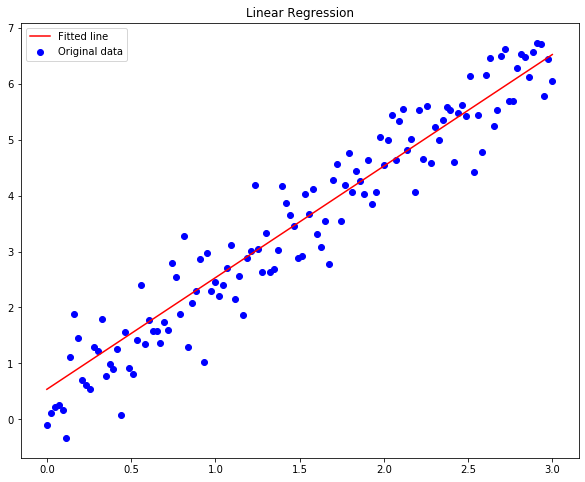

In [92]:
plt.figure(figsize=(10, 8))

plt.scatter(x, y, c = 'blue', label = 'Original data')
plt.plot(x, y_pred, color = 'r', label = 'Fitted line')

plt.title('Linear Regression') 
plt.legend() 
plt.show()